# Cleaning Wide Receiver Dataset

Author: Ermina Mujan

Date: April 19, 2021

This dataset is from kaggle user mur418. It contains data on NFL tight end players for 2019 actuals and 2020 projections

### Import packages and data

In [1]:
import pandas as pd # we are using pandas for data manipulation and analysis

import missingno as msno # we are using missingno to visualize the distribution of NaN(Not a Number) values

In [2]:
# bring in the wide receiver dataset as a pandas dataframe 

df = pd.read_csv('/Users/erminamujan/Downloads/wr_stats_and_projections.csv')

### Inspect the dataset's shape, head, and column names

In [3]:
# see how many rows and columns are in this dataset

shape_info = df.shape # set the dataframe's "shape" to a variable

In [4]:
print('This dataset evaluates {} wide receivers based on data from {} columns' # print this phrase with variables added in
      .format(shape_info[0], # using the .format method, insert the number of rows in the dataframe
              shape_info[1])) # using the .format method, insert the number of columns in the dataframe

This dataset evaluates 350 wide receivers based on data from 23 columns


In [5]:
df.head() # look at the first 5 rows of the wide receiver dataset

,Unnamed: 0,PLAYER NAME,TEAM,POSITION,2019 TAR,2019 REC,2019 REC YARDS,2019 AVG REC YARDS,2019 REC TDS,2019 RUSH CAR,...,2020 TAR,2020 REC,2020 REC YARDS,2020 AVG REC YARDS,2020 REC TDS,2020 RUSH CAR,2020 RUSH YARDS,2020 RUSH TDS,2020 FPTS,2020 PLAYER OUTLOOK
0,1,Michael Thomas,Saints,WR,185.0,149.0,1725.0,11.6,9.0,1.0,...,152.0,114.0,1351.0,11.9,9.0,0.0,0.0,0.0,301.44,Thomas is fresh off a historic 2019 season in ...
1,2,DeAndre Hopkins,Cardinals,WR,150.0,104.0,1165.0,11.2,7.0,2.0,...,141.0,92.0,1140.0,12.3,8.0,4.0,23.0,0.0,255.30,Hopkins was traded to the Cardinals during the...
2,3,Julio Jones,Falcons,WR,157.0,99.0,1394.0,14.1,6.0,2.0,...,139.0,89.0,1245.0,14.0,7.0,2.0,10.0,0.0,253.95,Jones is now 31 years old but remains an elite...
3,4,Chris Godwin,Buccaneers,WR,120.0,86.0,1333.0,15.5,9.0,1.0,...,131.0,88.0,1191.0,13.6,8.0,0.0,0.0,0.0,251.83,Godwin is entering his fourth NFL season and h...
4,5,Davante Adams,Packers,WR,127.0,83.0,997.0,12.0,5.0,0.0,...,137.0,90.0,1149.0,12.7,7.0,0.0,0.0,0.0,249.39,Adams is back as Aaron Rodgers' unquestioned N...


In [6]:
df.tail() # look at the last 5 rows of the wide receiver dataset

,Unnamed: 0,PLAYER NAME,TEAM,POSITION,2019 TAR,2019 REC,2019 REC YARDS,2019 AVG REC YARDS,2019 REC TDS,2019 RUSH CAR,...,2020 TAR,2020 REC,2020 REC YARDS,2020 AVG REC YARDS,2020 REC TDS,2020 RUSH CAR,2020 RUSH YARDS,2020 RUSH TDS,2020 FPTS,2020 PLAYER OUTLOOK
345,346,Taylor Gabriel,Bears,WR,48.0,29.0,353.0,12.2,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
346,347,TJ Jones,Giants,WR,4.0,3.0,38.0,12.7,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
347,348,Martavis Bryant,FA,WR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
348,349,Justin Hunter,FA,WR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
349,350,Nick Williams,FA,WR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.


In [7]:
list(df) # listing all column names

['Unnamed: 0',
 'PLAYER NAME',
 'TEAM',
 'POSITION',
 '2019 TAR',
 '2019 REC',
 '2019 REC YARDS',
 '2019 AVG REC YARDS',
 '2019 REC TDS',
 '2019 RUSH CAR',
 '2019 RUSH YARDS',
 '2019 RUSH TDS',
 '2019 FPTS',
 '2020 TAR',
 '2020 REC',
 '2020 REC YARDS',
 '2020 AVG REC YARDS',
 '2020 REC TDS',
 '2020 RUSH CAR',
 '2020 RUSH YARDS',
 '2020 RUSH TDS',
 '2020 FPTS',
 '2020 PLAYER OUTLOOK']

### Begin cleaning the dataset by improving readability of column names and dropping unnecessary columns and rows

In [8]:
# Dropping the following columns: 'Unnamed: 0' and '2020 PLAYER OUTLOOK'

df = df.drop(['Unnamed: 0', '2020 PLAYER OUTLOOK',], axis=1) 

In [9]:
# shows how many many columns have been deleted

new_shape = df.shape[1]

print('{} columns have been removed from the dataset'
      .format( abs(new_shape-shape_info[1])))

2 columns have been removed from the dataset


In [10]:
# removing spaces from old column names

df_old_cols = list(df) # instantiate a new list with old column names in it

df_new_cols = [x.replace(" ", "").capitalize() for x in df_old_cols] # remove the spaces and make everything lowercase

In [11]:
df_new_cols[0] # make sure it worked by checking the first name

'Playername'

In [12]:
df.columns = df_new_cols # make df_new_cols the column names

df.head() # check to make sure that this change stuck

,Playername,Team,Position,2019tar,2019rec,2019recyards,2019avgrecyards,2019rectds,2019rushcar,2019rushyards,...,2019fpts,2020tar,2020rec,2020recyards,2020avgrecyards,2020rectds,2020rushcar,2020rushyards,2020rushtds,2020fpts
0,Michael Thomas,Saints,WR,185.0,149.0,1725.0,11.6,9.0,1.0,-9.0,...,374.60,152.0,114.0,1351.0,11.9,9.0,0.0,0.0,0.0,301.44
1,DeAndre Hopkins,Cardinals,WR,150.0,104.0,1165.0,11.2,7.0,2.0,18.0,...,268.54,141.0,92.0,1140.0,12.3,8.0,4.0,23.0,0.0,255.30
2,Julio Jones,Falcons,WR,157.0,99.0,1394.0,14.1,6.0,2.0,-3.0,...,274.10,139.0,89.0,1245.0,14.0,7.0,2.0,10.0,0.0,253.95
3,Chris Godwin,Buccaneers,WR,120.0,86.0,1333.0,15.5,9.0,1.0,8.0,...,276.10,131.0,88.0,1191.0,13.6,8.0,0.0,0.0,0.0,251.83
4,Davante Adams,Packers,WR,127.0,83.0,997.0,12.0,5.0,0.0,0.0,...,212.70,137.0,90.0,1149.0,12.7,7.0,0.0,0.0,0.0,249.39


### Find and determine what to do with values that are "NaN" (Not a Number)

<AxesSubplot:>

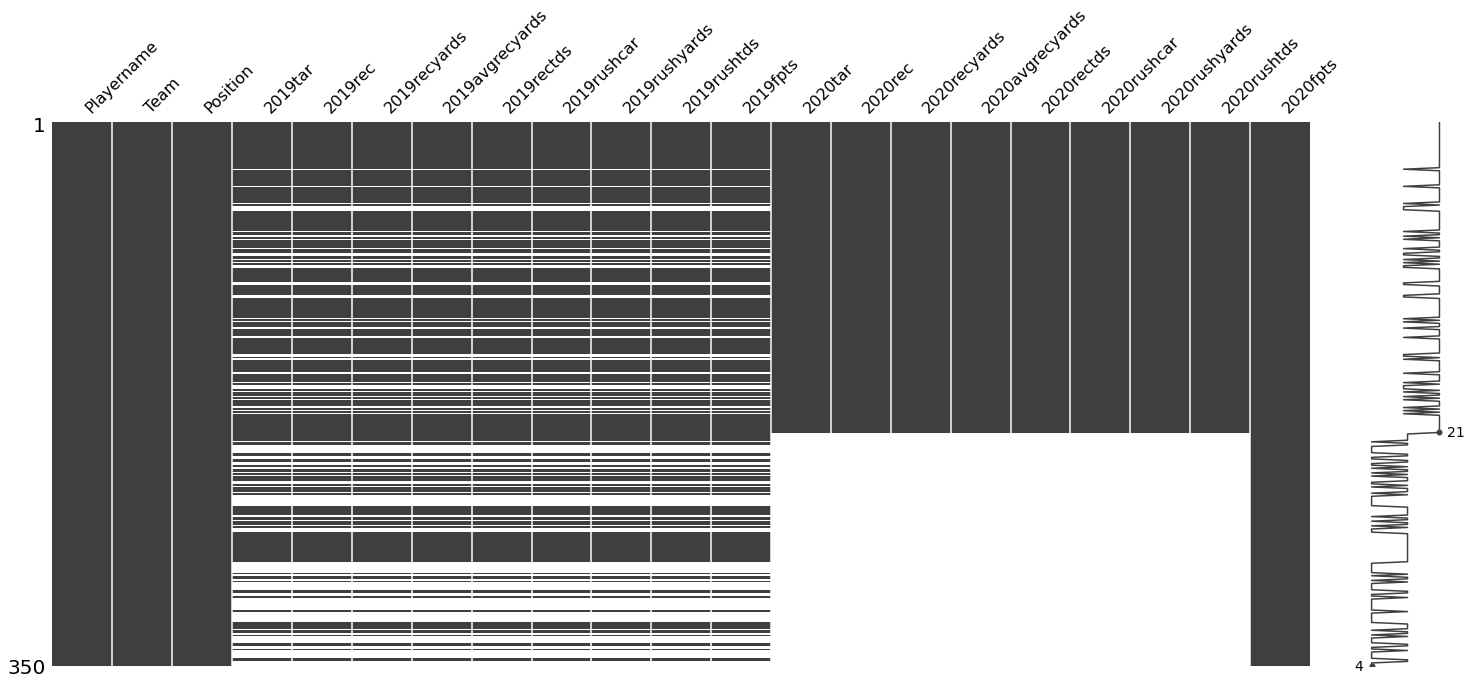

In [13]:
msno.matrix(df) # print a missing numbers matrix to show where missing numbers are

In [14]:
df[df['2020tar'].isna()] # shows missing values from '2020tar' column

,Playername,Team,Position,2019tar,2019rec,2019recyards,2019avgrecyards,2019rectds,2019rushcar,2019rushyards,...,2019fpts,2020tar,2020rec,2020recyards,2020avgrecyards,2020rectds,2020rushcar,2020rushyards,2020rushtds,2020fpts
200,Antonio Brown,FA,WR,8.0,4.0,56.0,14.0,1.0,1.0,5.0,...,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
201,Matthew Slater,Patriots,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
202,Marcell Ateman,Raiders,WR,10.0,5.0,116.0,23.2,0.0,0.0,0.0,...,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
203,Chad Williams,Colts,WR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
204,Deontay Burnett,Eagles,WR,4.0,2.0,48.0,24.0,0.0,0.0,0.0,...,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Taylor Gabriel,Bears,WR,48.0,29.0,353.0,12.2,4.0,3.0,20.0,...,90.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
346,TJ Jones,Giants,WR,4.0,3.0,38.0,12.7,1.0,0.0,0.0,...,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
347,Martavis Bryant,FA,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
348,Justin Hunter,FA,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
df = df.fillna(0) # use the .fillna() method to fill the NaNs with zeros

In [16]:
df.tail() # check out the last 5 rows in the dataset to ensure this filling of null values stuck

,Playername,Team,Position,2019tar,2019rec,2019recyards,2019avgrecyards,2019rectds,2019rushcar,2019rushyards,...,2019fpts,2020tar,2020rec,2020recyards,2020avgrecyards,2020rectds,2020rushcar,2020rushyards,2020rushtds,2020fpts
345,Taylor Gabriel,Bears,WR,48.0,29.0,353.0,12.2,4.0,3.0,20.0,...,90.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,TJ Jones,Giants,WR,4.0,3.0,38.0,12.7,1.0,0.0,0.0,...,12.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,Martavis Bryant,FA,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,Justin Hunter,FA,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,Nick Williams,FA,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Export the dataframe to a csv

In [17]:
df.to_csv('/Users/erminamujan/Downloads/cleaned_wr_stats_and_projections.csv')